In [46]:
# data from https://baseballsavant.mlb.com/

import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

In [33]:
%run cleaning.py

In [28]:
# import pandas as pd
# import numpy as np
# import os

# pitchers = pd.DataFrame(columns = ['player', 'release_speed_10', 'release_speed_25', 'release_speed_mean',
#                                    'release_speed_median', 'release_speed_75', 'release_speed_90', 
#                                    '1', '2', '3', '4', '5', '6', '7', '8', '9', '11', '12', '13', '14'])
# pitchers_full = pd.DataFrame()

# for file in os.listdir('pitchers/'):
#     df = pd.read_csv('pitchers/' + file) # reading in the file
#     df = df.dropna(subset='pitch_type') # dropping index where pitch isn't available
#     df = df.dropna(subset='zone') # dropping where zone isn't available

#     batter = 0
#     last_pitch = np.nan # sequence
#     this_pitch = np.nan # sequence
#     pitch_sequence = []
#     pitch_pct = {} # two-pitch sequences and individual pitch dictionary

#     # two pitch sequence percentages, pitch sequence = (slider --> fastball)
#     for i in df.index:
#         if df['batter'][i] != batter:
#             batter = df['batter'][i]
#             this_pitch = df['pitch_type'][i] # first pitch in an at-bat
#         elif df['batter'][i] == batter:
#             last_pitch = this_pitch
#             this_pitch = df['pitch_type'][i]
#             pitch_sequence.append((last_pitch, this_pitch)) # appending sequence to list

#     uq_pitch_sequences = list(set(pitch_sequence)) # finding unique pitch sequences

#     seq_counts = {} # how many times pitcher throws each sequence
#     for seq in uq_pitch_sequences:
#         count = pitch_sequence.count(seq) # how many times sequence is in list
#         seq_counts[seq] = count

#     for seq, count in zip(seq_counts, seq_counts.values()):
#         pitch_pct[seq[0] + '-' + seq[1]] = count/sum(seq_counts.values()) # pitch sequence count as % of total

#     # unique pitches percentages
#     pitches = df['pitch_type'].tolist()
#     uq_pitches = list(set(pitches)) # finding unique pitches

#     pitch_counts = {}
#     for pitch in uq_pitches:
#         count = pitches.count(pitch) # how many times pitch is in list
#         pitch_counts[pitch] = count

#     for pitch, count in zip(pitch_counts, pitch_counts.values()):
#         pitch_pct[pitch] = count/sum(pitch_counts.values()) # pitch count as % of total

#     pitches = pd.DataFrame([pitch_pct])

#     pitches['total_pitches'] = len(uq_pitches) # how many types of pitches can this pitcher throw?
#     pitches['player'] = df['pitcher'].unique()

#     release_speed = df['release_speed'].tolist() # what speed does this pitcher normally throw? release vs. effective,
#     pitches['release_speed_10'] = np.percentile(release_speed, 10) # effective shows what the batter perceives the
#     pitches['release_speed_25'] = np.percentile(release_speed, 25) # pitch speed is while release is what it actually
#     pitches['release_speed_mean'] = np.mean(release_speed) # is
#     pitches['release_speed_median'] = np.median(release_speed)
#     pitches['release_speed_75'] = np.percentile(release_speed, 75)
#     pitches['release_speed_90'] = np.percentile(release_speed, 90)

#     zones = df['zone'].tolist() # where the ball was thrown within strike / ball zone
#     uq_zones = list(set(zones)) # 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14

#     zone_counts = {}
#     for zone in uq_zones:
#         count = zones.count(zone) # how many times does the pitch land in this zone?
#         zone_counts[zone] = count

#     for zone, count in zip(zone_counts, zone_counts.values()):
#         pitches[str(int(zone))] = count/sum(zone_counts.values()) # zone count as % of total

#     existing_sequences = pitchers.columns

#     for column in pitches:
#         if column not in existing_sequences: # if we haven't seen this column yet
#             pitchers[column] = np.nan # add it to the df

#     pitchers = pitchers.append(pitches, ignore_index=True) # appending new pitcher to full df
#     pitchers_full = pitchers_full.append(df, ignore_index=True) # all of the pitches in one df

# pitchers.fillna(0, inplace=True)
# pitchers = pitchers[pitchers['release_speed_mean'] != 0.0]

In [34]:
pitchers # .to_csv('pitchers.csv')

,player,release_speed_10,release_speed_25,release_speed_mean,release_speed_median,release_speed_75,release_speed_90,1,2,3,...,CS-FF,FF-CS,CU-CS,CS-SL,SI-CS,CH-FS,FS-PO,CS-FC,CU-SV,SV-CU
0,647336,81.36,82.8,88.292737,91.2,93.0,94.00,0.057728,0.083799,0.050279,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,663558,81.80,82.9,87.691600,84.7,93.2,94.31,0.029333,0.036000,0.037333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,607625,78.90,80.9,87.724905,90.7,93.4,94.50,0.048801,0.047118,0.036180,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,621363,83.70,85.4,89.720604,91.9,92.8,93.40,0.065804,0.083064,0.038835,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,675916,82.00,83.0,89.568759,93.7,94.9,95.60,0.053206,0.068213,0.050477,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,622065,81.36,83.8,86.635918,86.3,90.4,91.14,0.009122,0.020525,0.025086,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
475,676775,87.50,88.5,91.535690,89.9,95.5,96.60,0.040404,0.057239,0.031987,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
476,643511,72.10,72.9,77.972865,81.1,82.8,83.50,0.028470,0.052491,0.043594,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
477,596133,82.50,85.8,89.433525,90.0,93.8,94.83,0.043401,0.052702,0.045616,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
pitchers_key = pitchers_full[['player_name', 'pitcher']]
pitchers_key = pitchers_key.drop_duplicates(subset=['player_name', 'pitcher'])
pitchers_key

,player_name,pitcher
0,"Soroka, Michael",647336
537,"Moran, Jovani",663558
1287,"Lugo, Seth",607625
3664,"Poche, Colin",621363
4591,"Karinchak, James",675916
...,...,...
639645,"Young, Alex",622065
640522,"Winn, Keaton",676775
641116,"Rogers, Tyler",643511
642240,"Weaver, Luke",596133


In [44]:
cluster_columns = pitchers[['release_speed_median', '1', '2', '3', '4', '5', '6', '7', 
                            '8', '9', '11', '12', '13', '14', 'SL', 'CH', 'SI', 'FF', 
                            'ST', 'CU', 'PO', 'SC', 'FS', 'FC', 'FA', 'KC', 'SV', 'KN', 
                            'CS', 'FO']]


scaler = StandardScaler()
selected_columns = scaler.fit_transform(cluster_columns)

number_list = [i for i in range(2, 21)] # trying to figure out how many clusters give the best score
for number in number_list:
    n_clusters = number 
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_assignments = kmeans.fit_predict(cluster_columns)
    silhouette_avg = silhouette_score(cluster_columns, cluster_assignments)
    print(number, ':', silhouette_avg)


2 : 0.5323614083971265
3 : 0.5010634354117428
4 : 0.4811665916230406
5 : 0.46254318827831276
6 : 0.45794008624028165
7 : 0.44904693660160494
8 : 0.43875172510304505
9 : 0.40744173499780245
10 : 0.39039145565906014
11 : 0.3805370207593109
12 : 0.38065607581577854
13 : 0.35796377917685873
14 : 0.3376538309908498
15 : 0.3215991875173653
16 : 0.3174872203491411
17 : 0.30497927835571836
18 : 0.3106913373311774
19 : 0.28586100836093825
20 : 0.28930387274055547


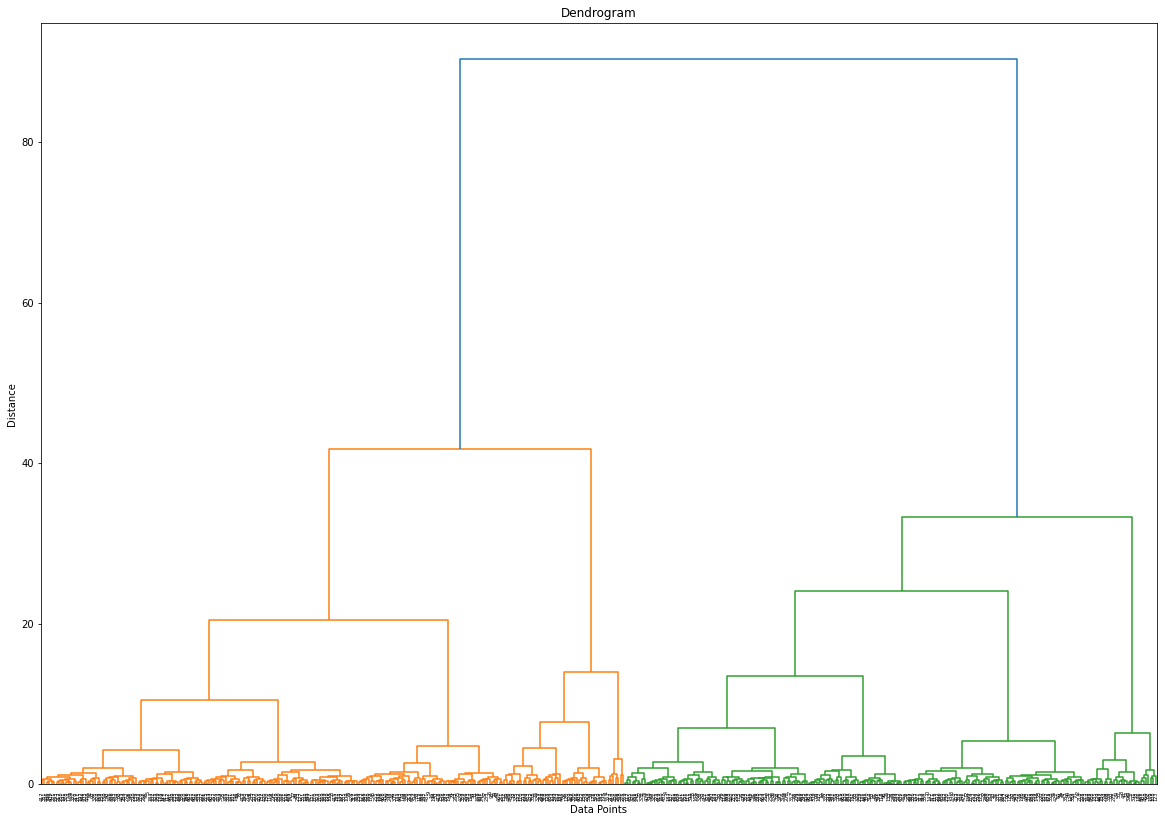

In [47]:
# Perform hierarchical clustering
linked = linkage(cluster_columns, method='ward')  # You can choose a different linkage method if needed

# Create a dendrogram
plt.figure(figsize=(20, 14))
dendrogram(linked, orientation='top', labels=pitchers.index, distance_sort='descending', show_leaf_counts=True)

# Add labels and title
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.title("Dendrogram")

plt.show()

In [94]:
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
cluster_assignments = kmeans.fit_predict(cluster_columns)
pitchers['cluster'] = kmeans.labels_
pitchers

,player,release_speed_10,release_speed_25,release_speed_mean,release_speed_median,release_speed_75,release_speed_90,1,2,3,...,FF-CS,CU-CS,CS-SL,SI-CS,CH-FS,FS-PO,CS-FC,CU-SV,SV-CU,cluster
0,647336,81.36,82.8,88.292737,91.2,93.0,94.00,0.057728,0.083799,0.050279,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,663558,81.80,82.9,87.691600,84.7,93.2,94.31,0.029333,0.036000,0.037333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,607625,78.90,80.9,87.724905,90.7,93.4,94.50,0.048801,0.047118,0.036180,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,621363,83.70,85.4,89.720604,91.9,92.8,93.40,0.065804,0.083064,0.038835,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
4,675916,82.00,83.0,89.568759,93.7,94.9,95.60,0.053206,0.068213,0.050477,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,622065,81.36,83.8,86.635918,86.3,90.4,91.14,0.009122,0.020525,0.025086,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
475,676775,87.50,88.5,91.535690,89.9,95.5,96.60,0.040404,0.057239,0.031987,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
476,643511,72.10,72.9,77.972865,81.1,82.8,83.50,0.028470,0.052491,0.043594,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
477,596133,82.50,85.8,89.433525,90.0,93.8,94.83,0.043401,0.052702,0.045616,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [95]:
# filter by cluster

pitchers.to_csv('pitchers.csv')

In [63]:
# dropping all pitches, pitch sequences that don't exist in these columns

pitchers0 = pitchers0.loc[:, (pitchers0 != 0).any(axis=0)]
pitchers1 = pitchers1.loc[:, (pitchers1 != 0).any(axis=0)]
pitchers2 = pitchers2.loc[:, (pitchers2 != 0).any(axis=0)]
pitchers3 = pitchers3.loc[:, (pitchers3 != 0).any(axis=0)]
pitchers4 = pitchers4.loc[:, (pitchers4 != 0).any(axis=0)]

,player,release_speed_10,release_speed_25,release_speed_mean,release_speed_median,release_speed_75,release_speed_90,1,2,3,...,KC-FC,FC-KC,ST-FS,FS-ST,KC-FS,FS-KC,FF-KN,KN,SL-PO,cluster
8,622554,89.60,91.200,95.321769,97.3,98.00,98.70,0.052386,0.047730,0.025611,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
10,645261,89.20,90.700,94.114370,95.0,97.80,98.70,0.053289,0.053657,0.025358,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
14,660813,88.18,93.800,95.519699,97.3,98.70,99.42,0.067815,0.083961,0.068891,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
18,640451,85.22,88.700,93.900415,97.3,98.55,99.30,0.056075,0.077882,0.049844,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
25,641329,81.36,85.375,90.573852,94.4,96.00,96.80,0.073980,0.066327,0.047194,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,656464,85.80,87.000,91.719336,94.4,95.70,96.40,0.040758,0.054976,0.046445,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
461,605540,84.30,86.400,91.795302,94.6,95.90,96.60,0.047939,0.072867,0.041227,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
467,606160,88.92,91.500,93.874062,95.3,96.20,96.80,0.039106,0.048683,0.052674,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
468,472610,80.70,82.100,90.990990,95.9,97.50,98.30,0.033663,0.032673,0.017822,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [65]:
pitchers0.to_csv('pitchers0.csv')
pitchers1.to_csv('pitchers1.csv')
pitchers2.to_csv('pitchers2.csv')
pitchers3.to_csv('pitchers3.csv')
pitchers4.to_csv('pitchers4.csv')

In [92]:
pitchers_vis = pitchers.groupby('cluster').agg({'1': 'mean', '2': 'mean', '3': 'mean', '4': 'mean', '5': 'mean',
                                                '6': 'mean', '7': 'mean', '8': 'mean', '9': 'mean', '11': 'mean', 
                                                '12': 'mean', '13': 'mean', '14': 'mean', 'SL': 'mean', 'CH': 'mean',
                                                'SI': 'mean', 'FF': 'mean', 'ST': 'mean', 'CU': 'mean', 'PO': 'mean', 
                                                'SC': 'mean', 'FS': 'mean', 'FC': 'mean', 'FA': 'mean', 'KC': 'mean', 
                                                'SV': 'mean', 'KN': 'mean', 'CS': 'mean', 'FO':'mean'}).reset_index()

# pitchers_vis = pitchers.groupby('cluster').agg({'1': 'median', '2': 'median', '3': 'median', '4': 'median', '5': 'median',
#                                                 '6': 'median', '7': 'median', '8': 'median', '9': 'median', '11': 'median', 
#                                                 '12': 'median', '13': 'median', '14': 'median', 'SL': 'median', 'CH': 'median',
#                                                 'SI': 'median', 'FF': 'median', 'ST': 'median', 'CU': 'median', 'PO': 'median', 
#                                                 'SC': 'median', 'FS': 'median', 'FC': 'median', 'FA': 'median', 'KC': 'median', 
#                                                 'SV': 'median', 'KN': 'median', 'CS': 'median', 'FO':'median'}).reset_index()
pitchers_vis

,cluster,1,2,3,4,5,6,7,8,9,...,PO,SC,FS,FC,FA,KC,SV,KN,CS,FO
0,0,0.038759,0.048841,0.037058,0.058494,0.074603,0.059974,0.050009,0.066161,0.056681,...,0.000023,0.000000,0.019155,0.063024,0.000000,0.021051,0.000000,0.002611,0.000103,0.000000
1,1,0.042238,0.049137,0.036444,0.059205,0.073615,0.059163,0.048184,0.063297,0.055898,...,0.000093,0.000362,0.022704,0.094118,0.000003,0.010930,0.004022,0.000000,0.000015,0.001095
2,2,0.046361,0.053675,0.039019,0.060785,0.076891,0.059932,0.045365,0.063642,0.052599,...,0.000053,0.000000,0.022856,0.065451,0.000000,0.014827,0.002117,0.000003,0.000000,0.000000


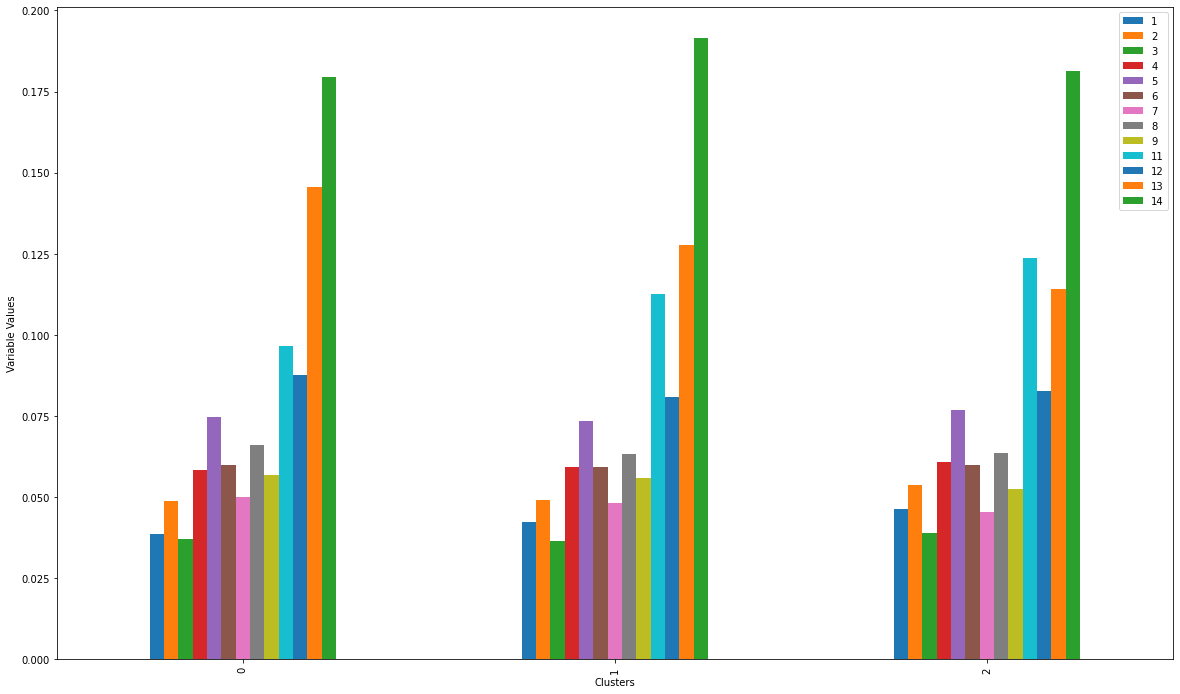

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a grouped bar chart
# ax = pitchers_vis.plot(x='cluster', y=['SL', 'CH', 'SI', 'FF', 'ST', 'CU', 'PO', 'SC', 'FS', 'FC', 
#                                        'FA', 'KC', 'SV', 'KN', 'CS', 'FO'], kind='bar', figsize=(20, 12))

ax = pitchers_vis.plot(x='cluster', y=['1', '2', '3', '4', '5', '6', '7', '8', '9', '11', '12', '13', '14'], 
                       kind='bar', figsize=(20, 12))
ax.set_xlabel("Clusters")
ax.set_ylabel("Variable Values")

# Customize the x-axis label positions
# plt.xticks(range(5), pitchers['cluster'])

# Display the plot
plt.show()

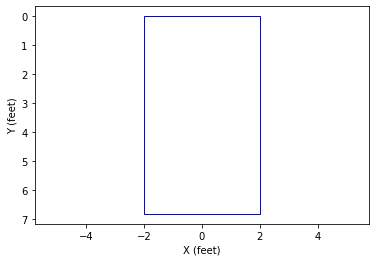

In [98]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create a figure and axis
fig, ax = plt.subplots()

# Define the dimensions of the batter's box
box_width = 4.0  # In feet (approximate dimensions)
box_height = 6.833  # In feet (approximate dimensions)

# Draw the batter's box as a rectangle
box = patches.Rectangle((-box_width/2, 0), box_width, box_height, linewidth=1, edgecolor='blue', facecolor='none')

# Add the batter's box to the plot
ax.add_patch(box)

# Set axis limits and labels
ax.set_xlim(-10, 10)  # Adjust these limits as needed
ax.set_ylim(0, 10)    # Adjust these limits as needed
ax.set_xlabel('X (feet)')
ax.set_ylabel('Y (feet)')

# Show the plot
plt.gca().invert_yaxis()  # Invert the Y-axis to match a traditional baseball field
plt.axis('equal')         # Make the aspect ratio equal
plt.show()

In [99]:
pitchers_full

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,FF,2023-09-05,94.3,-2.21,5.88,"Soroka, Michael",575929,647336,strikeout,swinging_strike,...,1,5,1,5,1,NaN,Standard,225.0,0.005,-0.130
1,SL,2023-09-05,83.4,-2.04,6.31,"Soroka, Michael",575929,647336,NaN,foul,...,1,5,1,5,1,NaN,Standard,58.0,0.000,0.000
2,FF,2023-09-05,94.5,-2.31,5.89,"Soroka, Michael",575929,647336,NaN,ball,...,1,5,1,5,1,Standard,Standard,221.0,0.000,0.040
3,SL,2023-09-05,82.8,-2.00,6.34,"Soroka, Michael",575929,647336,NaN,called_strike,...,1,5,1,5,1,Standard,Standard,54.0,0.000,-0.031
4,FF,2023-09-05,92.3,-2.42,5.88,"Soroka, Michael",575929,647336,NaN,ball,...,1,5,1,5,1,Standard,Standard,227.0,0.000,0.021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645726,FS,2023-03-31,87.9,-1.60,5.86,"McGough, Scott",681546,543518,NaN,blocked_ball,...,2,2,1,1,2,Standard,Standard,217.0,0.000,0.058
645727,FS,2023-03-31,86.5,-1.69,5.82,"McGough, Scott",681546,543518,NaN,swinging_strike,...,2,2,1,1,2,Standard,Standard,223.0,0.000,-0.076
645728,FS,2023-03-31,87.8,-1.55,5.91,"McGough, Scott",681546,543518,NaN,ball,...,2,2,1,1,2,Standard,Standard,216.0,0.000,0.024
645729,FS,2023-03-31,87.7,-1.62,5.81,"McGough, Scott",681546,543518,NaN,ball,...,2,2,1,1,2,NaN,Standard,216.0,0.032,0.021
